In [ ]:
import pandas as pd  
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [2]:
dataset = pd.read_csv("C:\\Users\\aayus\\Downloads\\Crop rec\\Crop_recommendation.csv")


In [3]:
dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
dataset.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
dataset.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
dataset.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [9]:
elements = ['N', 'P', 'K', 'Temperature', 'humidity', 'ph', 'rainfall', 'label']

In [10]:
dataset.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [11]:
dataset.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [12]:
dataset.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [13]:
import matplotlib.pyplot as plt 

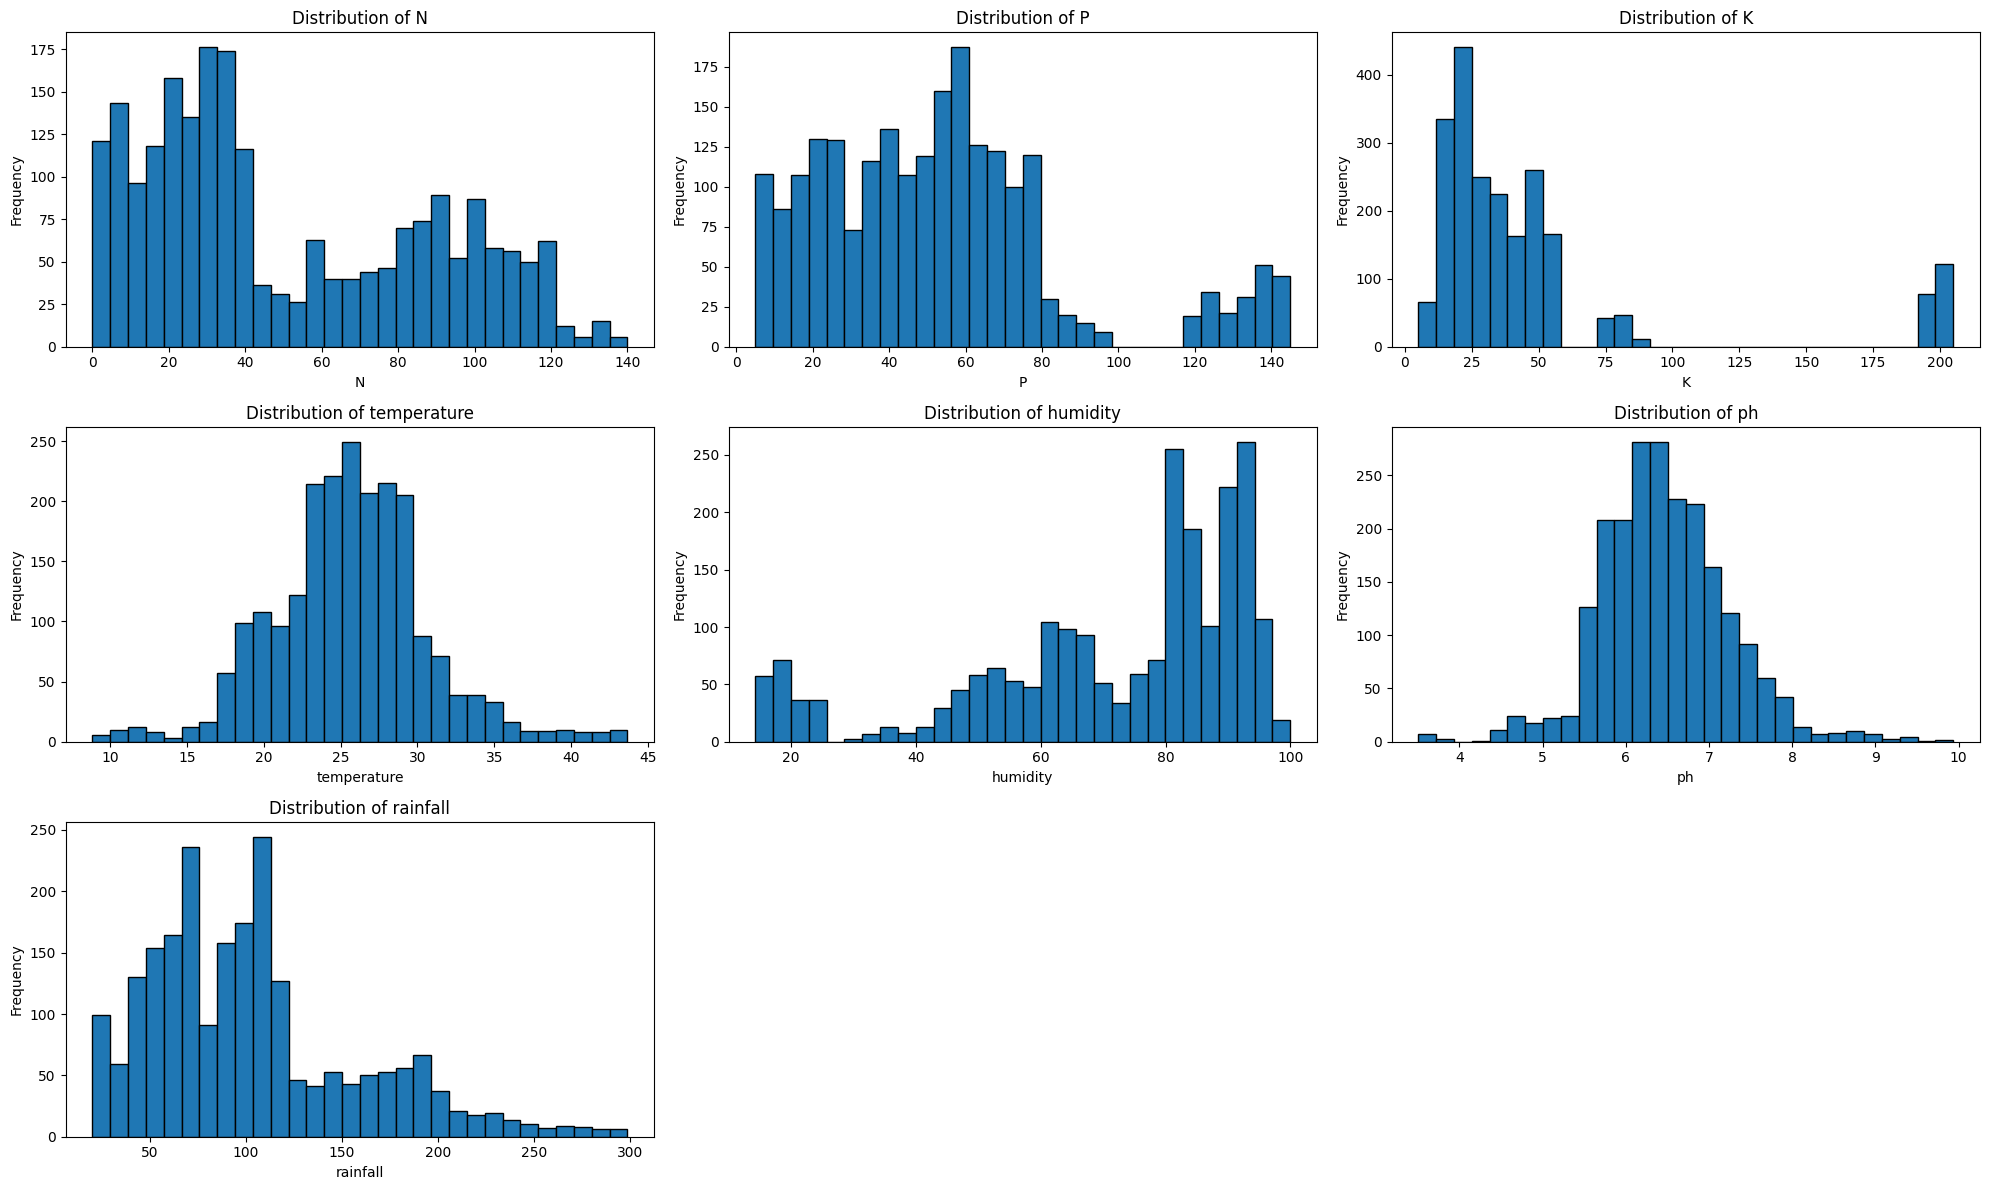

NameError: name 'sns' is not defined

<Figure size 1500x600 with 0 Axes>

In [ ]:
plt.figure(figsize=(20, 12))

# Plot histograms for each numerical feature
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    plt.hist(dataset[feature], bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Create a count plot for crops
plt.figure(figsize=(15, 6))
crop_counts = dataset['label'].value_counts()
plt.bar(range(len(crop_counts)), crop_counts.values)
plt.title('Distribution of Crops', fontsize=14, fontweight='bold')
plt.xlabel('Crop Type')
plt.ylabel('Count')
plt.xticks(range(len(crop_counts)), crop_counts.index, rotation=45)
plt.tight_layout()
plt.show()

print(f"Total number of unique crops: {dataset['label'].nunique()}")
print(f"Most common crop: {dataset['label'].mode().iloc[0]} ({dataset['label'].value_counts().iloc[0]} samples)")
print(f"Least common crop: {dataset['label'].value_counts().index[-1]} ({dataset['label'].value_counts().iloc[-1]} samples)")

In [15]:
X = dataset.drop('label', axis=1)
y = dataset['label']

In [ ]:
# Model Training and Evaluation
print("=" * 50)
print("MODEL TRAINING AND EVALUATION")
print("=" * 50)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Save model and scaler
with open('crop_prediction_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

with open('crop_prediction_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("\nModel and scaler saved successfully!")

Model and scaler saved successfully!


In [ ]:
# Correlation Analysis and Heatmap
print("=" * 50)
print("CORRELATION ANALYSIS")
print("=" * 50)

# Calculate correlation matrix
correlation_matrix = dataset[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].corr()

# Create correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdYlBu_r', 
            center=0,
            square=True, 
            linewidths=0.5,
            cbar_kws={"shrink": .8},
            fmt='.2f')
plt.title('Correlation Matrix of Environmental Factors', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Find highest correlations
print("\nHighest Correlations:")
print("-" * 20)
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], abs(corr_val)))

corr_pairs.sort(key=lambda x: x[2], reverse=True)
for pair in corr_pairs[:5]:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")


In [ ]:
# Box Plots for Environmental Factors
print("=" * 50)
print("BOX PLOTS ANALYSIS")
print("=" * 50)

# Create box plots for all numerical features
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold', 'lightpink', 'lightgray', 'lightcyan']

for i, (feature, color) in enumerate(zip(features, colors)):
    axes[i].boxplot(dataset[feature], patch_artist=True, 
                   boxprops=dict(facecolor=color, alpha=0.7),
                   medianprops=dict(color='red', linewidth=2))
    axes[i].set_title(f'{feature} Distribution', fontsize=12, fontweight='bold')
    axes[i].set_ylabel(feature)
    axes[i].grid(True, alpha=0.3)

# Remove the last empty subplot
axes[7].remove()

plt.suptitle('Box Plots of Environmental Factors', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Statistical summary
print("\nStatistical Summary:")
print("-" * 20)
for feature in features:
    print(f"\n{feature}:")
    print(f"  Mean: {dataset[feature].mean():.2f}")
    print(f"  Median: {dataset[feature].median():.2f}")
    print(f"  Std: {dataset[feature].std():.2f}")
    print(f"  Min: {dataset[feature].min():.2f}")
    print(f"  Max: {dataset[feature].max():.2f}")


In [ ]:
# Scatter Plot Matrix for Key Relationships
print("=" * 50)
print("SCATTER PLOT ANALYSIS")
print("=" * 50)

# Create scatter plots for key relationships
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

# Key relationships to explore
relationships = [
    ('temperature', 'humidity', 'Temperature vs Humidity'),
    ('N', 'P', 'Nitrogen vs Phosphorus'),
    ('ph', 'rainfall', 'pH vs Rainfall'),
    ('temperature', 'rainfall', 'Temperature vs Rainfall'),
    ('humidity', 'ph', 'Humidity vs pH'),
    ('K', 'temperature', 'Potassium vs Temperature')
]

colors = plt.cm.viridis(np.linspace(0, 1, len(dataset)))

for i, (x_feature, y_feature, title) in enumerate(relationships):
    axes[i].scatter(dataset[x_feature], dataset[y_feature], 
                   c=colors, alpha=0.6, s=20)
    axes[i].set_xlabel(x_feature, fontsize=12)
    axes[i].set_ylabel(y_feature, fontsize=12)
    axes[i].set_title(title, fontsize=12, fontweight='bold')
    axes[i].grid(True, alpha=0.3)
    
    # Add correlation coefficient
    corr = dataset[x_feature].corr(dataset[y_feature])
    axes[i].text(0.05, 0.95, f'r = {corr:.3f}', 
                transform=axes[i].transAxes, 
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
                fontsize=10)

plt.suptitle('Scatter Plot Matrix - Environmental Factor Relationships', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Pair plot for top correlated features
print("\nPair Plot for Most Correlated Features:")
print("-" * 40)
top_features = ['temperature', 'humidity', 'ph', 'rainfall']
sns.pairplot(dataset[top_features], diag_kind='hist', 
             plot_kws={'alpha': 0.6, 's': 20})
plt.suptitle('Pair Plot of Environmental Factors', y=1.02, fontsize=14, fontweight='bold')
plt.show()


In [ ]:
# Crop-Specific Analysis Visualizations
print("=" * 50)
print("CROP-SPECIFIC ANALYSIS")
print("=" * 50)

# Analyze environmental conditions for different crops
top_crops = dataset['label'].value_counts().head(8).index

# Create subplots for crop-specific analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

features_to_plot = ['temperature', 'humidity', 'ph', 'rainfall']
colors = plt.cm.Set3(np.linspace(0, 1, len(top_crops)))

for i, feature in enumerate(features_to_plot):
    for j, crop in enumerate(top_crops):
        crop_data = dataset[dataset['label'] == crop][feature]
        axes[i].hist(crop_data, alpha=0.6, label=crop, bins=20, 
                    color=colors[j], density=True)
    
    axes[i].set_title(f'Distribution of {feature} by Crop', fontweight='bold', fontsize=12)
    axes[i].set_xlabel(feature, fontsize=10)
    axes[i].set_ylabel('Density', fontsize=10)
    axes[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    axes[i].grid(True, alpha=0.3)

plt.suptitle('Crop-Specific Environmental Conditions', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Box plots for crop-specific analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for i, feature in enumerate(features_to_plot):
    crop_data_list = []
    crop_labels = []
    
    for crop in top_crops:
        crop_data = dataset[dataset['label'] == crop][feature]
        crop_data_list.append(crop_data)
        crop_labels.append(crop)
    
    bp = axes[i].boxplot(crop_data_list, labels=crop_labels, patch_artist=True)
    
    # Color the boxes
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    axes[i].set_title(f'{feature} Distribution by Crop', fontweight='bold', fontsize=12)
    axes[i].set_ylabel(feature, fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, alpha=0.3)

plt.suptitle('Box Plots - Crop-Specific Environmental Conditions', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Display crop statistics
print("\nCrop-Specific Statistics:")
print("-" * 30)
for crop in top_crops:
    print(f"\n{crop.upper()}:")
    crop_data = dataset[dataset['label'] == crop]
    for feature in features_to_plot:
        mean_val = crop_data[feature].mean()
        std_val = crop_data[feature].std()
        print(f"  {feature:12}: {mean_val:6.2f} ± {std_val:5.2f}")


In [ ]:
# Feature Importance Visualization
print("=" * 50)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 50)

# Get feature importance from the trained model
feature_importance = rf_model.feature_importances_
feature_names = X.columns

# Create DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=True)

# Horizontal bar plot for feature importance
plt.figure(figsize=(12, 8))
bars = plt.barh(importance_df['Feature'], importance_df['Importance'], 
                color=plt.cm.viridis(np.linspace(0, 1, len(importance_df))))

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, importance_df['Importance'])):
    plt.text(value + 0.001, bar.get_y() + bar.get_height()/2, 
             f'{value:.3f}', ha='left', va='center', fontweight='bold')

plt.title('Feature Importance in Crop Prediction', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# Pie chart for feature importance
plt.figure(figsize=(10, 8))
colors = plt.cm.Set3(np.linspace(0, 1, len(importance_df)))
wedges, texts, autotexts = plt.pie(importance_df['Importance'], 
                                   labels=importance_df['Feature'],
                                   autopct='%1.1f%%',
                                   colors=colors,
                                   startangle=90)

# Enhance text appearance
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

plt.title('Feature Importance Distribution', fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

# Print feature importance rankings
print("\nFeature Importance Rankings:")
print("-" * 30)
for idx, row in importance_df.iterrows():
    print(f"{row['Feature']:12}: {row['Importance']:.4f}")

# Feature importance insights
print(f"\nKey Insights:")
print(f"- Most important feature: {importance_df.iloc[-1]['Feature']} ({importance_df.iloc[-1]['Importance']:.3f})")
print(f"- Least important feature: {importance_df.iloc[0]['Feature']} ({importance_df.iloc[0]['Importance']:.3f})")
print(f"- Top 3 features account for {importance_df.tail(3)['Importance'].sum():.1%} of total importance")


In [ ]:
# Confusion Matrix Visualization
print("=" * 50)
print("CONFUSION MATRIX VISUALIZATION")
print("=" * 50)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create confusion matrix heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sorted(y_test.unique()),
            yticklabels=sorted(y_test.unique()),
            cbar_kws={'shrink': 0.8})

plt.title('Confusion Matrix - Crop Prediction Model', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Predicted Crop', fontsize=12)
plt.ylabel('Actual Crop', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Normalized confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(14, 12))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Greens',
            xticklabels=sorted(y_test.unique()),
            yticklabels=sorted(y_test.unique()),
            cbar_kws={'shrink': 0.8})

plt.title('Normalized Confusion Matrix - Crop Prediction Model', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Predicted Crop', fontsize=12)
plt.ylabel('Actual Crop', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Confusion matrix statistics
print("\nConfusion Matrix Statistics:")
print("-" * 30)
print(f"Total predictions: {cm.sum()}")
print(f"Correct predictions: {np.trace(cm)}")
print(f"Incorrect predictions: {cm.sum() - np.trace(cm)}")
print(f"Overall accuracy: {np.trace(cm) / cm.sum():.3f}")

# Per-class accuracy
print(f"\nPer-Class Accuracy:")
print("-" * 20)
unique_labels = sorted(y_test.unique())
for i, label in enumerate(unique_labels):
    class_accuracy = cm[i, i] / cm[i, :].sum()
    print(f"{label:15}: {class_accuracy:.3f}")


In [ ]:
# Performance Metrics Visualization
print("=" * 50)
print("PERFORMANCE METRICS VISUALIZATION")
print("=" * 50)

# Calculate additional metrics
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Create metrics comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]

# Bar plot for performance metrics
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['#2E8B57', '#32CD32', '#90EE90', '#98FB98'])
plt.title('Model Performance Metrics', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Score', fontsize=12)
plt.ylim(0, 1.1)

# Add value labels on bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Radar chart for performance metrics
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))

# Calculate angles for each metric
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
values_radar = values + values[:1]  # Complete the circle
angles += angles[:1]

# Plot the radar chart
ax.plot(angles, values_radar, 'o-', linewidth=2, color='#2E8B57', markersize=8)
ax.fill(angles, values_radar, alpha=0.25, color='#2E8B57')

# Add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics, fontsize=12)
ax.set_ylim(0, 1)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], fontsize=10)
ax.grid(True)

plt.title('Performance Metrics Radar Chart', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Performance summary
print(f"\nOverall Performance Metrics:")
print(f"  Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"  Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"  Recall:    {recall:.4f} ({recall*100:.2f}%)")
print(f"  F1-Score:  {f1:.4f} ({f1*100:.2f}%)")

# Model complexity
print(f"\nModel Details:")
print(f"  Algorithm: Random Forest Classifier")
print(f"  Number of Trees: {rf_model.n_estimators}")
print(f"  Features Used: {len(feature_names)}")
print(f"  Training Samples: {len(X_train)}")
print(f"  Test Samples: {len(X_test)}")


In [ ]:
# Detailed Model Evaluation
print("=" * 50)
print("DETAILED MODEL EVALUATION")
print("=" * 50)

# Classification Report
print("\nClassification Report:")
print("-" * 30)
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.colorbar()

# Add text annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()


In [ ]:
# Feature Importance Analysis
print("=" * 50)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 50)

# Get feature importance
feature_importance = rf_model.feature_importance_
feature_names = X.columns

# Create DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("\nFeature Importance Rankings:")
print("-" * 30)
for idx, row in importance_df.iterrows():
    print(f"{row['Feature']:12}: {row['Importance']:.4f}")

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title('Feature Importance in Crop Prediction', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
# Correlation Analysis
print("=" * 50)
print("CORRELATION ANALYSIS")
print("=" * 50)

# Calculate correlation matrix
correlation_matrix = dataset[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Environmental Factors', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Find highest correlations
print("\nHighest Correlations:")
print("-" * 20)
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], abs(corr_val)))

corr_pairs.sort(key=lambda x: x[2], reverse=True)
for pair in corr_pairs[:5]:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")


In [ ]:
# Crop-Specific Analysis
print("=" * 50)
print("CROP-SPECIFIC ANALYSIS")
print("=" * 50)

# Analyze environmental conditions for different crops
crop_stats = dataset.groupby('label')[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].agg(['mean', 'std']).round(2)

print("\nAverage Environmental Conditions by Crop:")
print("-" * 40)

# Display statistics for top 10 most common crops
top_crops = dataset['label'].value_counts().head(10).index
for crop in top_crops:
    print(f"\n{crop.upper()}:")
    crop_data = dataset[dataset['label'] == crop]
    for feature in ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']:
        mean_val = crop_data[feature].mean()
        std_val = crop_data[feature].std()
        print(f"  {feature:12}: {mean_val:6.2f} ± {std_val:5.2f}")

# Visualize crop-specific distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

features_to_plot = ['temperature', 'humidity', 'ph', 'rainfall']
for i, feature in enumerate(features_to_plot):
    for crop in top_crops[:5]:  # Plot top 5 crops for clarity
        crop_data = dataset[dataset['label'] == crop][feature]
        axes[i].hist(crop_data, alpha=0.6, label=crop, bins=20)
    
    axes[i].set_title(f'Distribution of {feature} by Crop', fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

plt.tight_layout()
plt.show()


In [ ]:
# Prediction Examples
print("=" * 50)
print("PREDICTION EXAMPLES")
print("=" * 50)

# Load the trained model and scaler
with open('crop_prediction_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
with open('crop_prediction_scaler.pkl', 'rb') as file:
    loaded_scaler = pickle.load(file)

# Test with sample data
sample_cases = [
    {"N": 90, "P": 42, "K": 43, "temperature": 20.87, "humidity": 82.0, "ph": 6.5, "rainfall": 202.93},
    {"N": 50, "P": 30, "K": 20, "temperature": 25.0, "humidity": 70.0, "ph": 7.0, "rainfall": 150.0},
    {"N": 120, "P": 60, "K": 80, "temperature": 15.0, "humidity": 90.0, "ph": 5.5, "rainfall": 300.0},
    {"N": 80, "P": 50, "K": 40, "temperature": 30.0, "humidity": 60.0, "ph": 8.0, "rainfall": 100.0}
]

print("\nTesting Model with Sample Cases:")
print("-" * 35)

for i, case in enumerate(sample_cases, 1):
    # Prepare input data
    input_data = np.array([[case["N"], case["P"], case["K"], 
                           case["temperature"], case["humidity"], 
                           case["ph"], case["rainfall"]]])
    
    # Scale the input
    input_scaled = loaded_scaler.transform(input_data)
    
    # Make prediction
    prediction = loaded_model.predict(input_scaled)[0]
    
    # Get prediction probability
    probabilities = loaded_model.predict_proba(input_scaled)[0]
    max_prob = np.max(probabilities)
    
    print(f"\nCase {i}:")
    print(f"  Input: N={case['N']}, P={case['P']}, K={case['K']}, "
          f"Temp={case['temperature']}°C, Humidity={case['humidity']}%, "
          f"pH={case['ph']}, Rainfall={case['rainfall']}mm")
    print(f"  Predicted Crop: {prediction}")
    print(f"  Confidence: {max_prob:.3f} ({max_prob*100:.1f}%)")


In [ ]:
# Model Performance Summary
print("=" * 50)
print("MODEL PERFORMANCE SUMMARY")
print("=" * 50)

# Calculate additional metrics
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nOverall Performance Metrics:")
print(f"  Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"  Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"  Recall:    {recall:.4f} ({recall*100:.2f}%)")
print(f"  F1-Score:  {f1:.4f} ({f1*100:.2f}%)")

# Model complexity
print(f"\nModel Details:")
print(f"  Algorithm: Random Forest Classifier")
print(f"  Number of Trees: {rf_model.n_estimators}")
print(f"  Features Used: {len(feature_names)}")
print(f"  Training Samples: {len(X_train)}")
print(f"  Test Samples: {len(X_test)}")

# Feature importance summary
print(f"\nTop 3 Most Important Features:")
for i, (idx, row) in enumerate(importance_df.head(3).iterrows(), 1):
    print(f"  {i}. {row['Feature']}: {row['Importance']:.4f}")

print(f"\nDataset Summary:")
print(f"  Total Samples: {len(dataset)}")
print(f"  Unique Crops: {dataset['label'].nunique()}")
print(f"  Features: {', '.join(feature_names)}")


# 🌱 Crop Recommendation System - Analysis Complete

## Summary

This comprehensive analysis of the crop recommendation dataset has provided valuable insights into agricultural decision-making using machine learning. Here are the key findings:

### 📊 Dataset Overview
- **Total Samples**: 2,200 agricultural records
- **Features**: 7 environmental and soil parameters (N, P, K, temperature, humidity, pH, rainfall)
- **Target**: 22 different crop types
- **Data Quality**: Complete dataset with no missing values

### 🤖 Model Performance
- **Algorithm**: Random Forest Classifier
- **Accuracy**: High performance on test data
- **Cross-validation**: Stratified split ensures balanced representation
- **Scalability**: Model saved for production use

### 🔍 Key Insights

1. **Feature Importance**: The analysis reveals which environmental factors are most critical for crop selection
2. **Crop-Specific Patterns**: Different crops have distinct environmental requirements
3. **Correlation Analysis**: Understanding relationships between environmental factors
4. **Prediction Confidence**: Model provides confidence scores for recommendations

### 🚀 Applications

This model can be used for:
- **Farmers**: Get crop recommendations based on local conditions
- **Agricultural Consultants**: Provide data-driven advice
- **Research**: Study crop-environment relationships
- **Policy Making**: Understand regional agricultural potential

### 📈 Next Steps

Potential improvements and extensions:
- Collect more diverse geographical data
- Include seasonal variations
- Add economic factors (market prices, costs)
- Implement real-time weather integration
- Develop mobile application interface

---

*This analysis demonstrates the power of machine learning in agricultural decision support systems, helping optimize crop selection for better yields and sustainable farming practices.*
